# Numerical simulation for double-bracket quantum algorithms for quantum imaginary-time evolution (DB-QITE) using density matrix exponentiation (DME)

## 1. Initialization

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.optimize import minimize
import sys, warnings

# Load custom modules
sys.path.append('..')
from functions.qite_gci import *
from functions.qite_dme import *

# Plotting defaults
plt.rcParams.update({
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'font.size': 16,
    'savefig.dpi': 75,
    'lines.linewidth': 2.0,
    'lines.markersize': 8,
    'legend.fontsize': 14,
    'legend.labelspacing': .3,
    'legend.columnspacing': .3,
    'legend.handletextpad': .1,
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': 'cm',
    'figure.figsize': [5, 3.5],
    'figure.autolayout': True
})

warnings.filterwarnings("ignore", category=UserWarning)

# Darkened rainbow color palette
from matplotlib import cm
n_colors = 6
dark_factor = 0.8
color = [(r * dark_factor, g * dark_factor, b * dark_factor, a) 
         for r, g, b, a in cm.rainbow(np.linspace(1, 0, n_colors))]
markers = ['o','s','^','*','P','*','h']


In [60]:
optimal_s = []
for k in range(1,7):
    psi0 = np.sqrt(1/2)*np.array([[1],[1j]])
    def dbqite(s):
        return GCI(QITE_dme_select_M(50), psi0, None, optimal_s + [s]).execute_gci()[0][-1].real

    result = minimize(dbqite, 0.7, method='BFGS')
    optimal_s = optimal_s + [result.x[0]]

In [61]:
psi0 = np.sqrt(1/2)*np.array([[1],[1j]])
psi0 = np.array([[0],[1]])
psis = []
number_steps = 100
thetas = np.linspace(0,1,number_steps)
sigma_x_np = np.array([[0,1],
                       [1,0]])
for i in thetas:
    psis.append(expm(-1j*np.pi/2*sigma_x_np*i) @ psi0)
psis = np.asarray(psis)

res_init = []
dict_res_DBQITE = {}

for psi0 in psis:
    res_init.append(GCI(initial_psi, psi0, 1, np.linspace(0.01,1,2)).execute_gci()[0][-1])   

target_fidelity = 0.9
for k in range(1,7):
    print(k)
    res_DBQITE = []
    for psi0 in psis:
        res_DBQITE.append(GCI(QITE_dme_select_M(50), psi0, None, optimal_s[:k]).execute_gci()[0][-1])
        # dict_res_DBQITE.update({f'M={np.round(M,2)}, s={np.round(s,2):.2f}' : res_DBQITE})
        dict_res_DBQITE.update({f'k={k}' : res_DBQITE})

0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of inter

In [62]:
psi0 = np.sqrt(1/2)*np.array([[1],[1j]])
psi0 = np.array([[0],[1]])
psis = []
number_steps = 100
thetas = np.linspace(0,1,number_steps)
sigma_x_np = np.array([[0,1],
                       [1,0]])
for i in thetas:
    psis.append(expm(-1j*np.pi/2*sigma_x_np*i) @ psi0)
psis = np.asarray(psis)

res_init = []
dict_res_DBQITE = {}

for psi0 in psis:
    res_init.append(GCI(initial_psi, psi0, 1, np.linspace(0.01,1,2)).execute_gci()[0][-1])   

target_fidelity = 0.9
for k in range(1,7):
    print(k)
    res_DBQITE = []
    for psi0 in psis:
        res_DBQITE.append(GCI(ideal_DME, psi0, None, optimal_s[:k]).execute_gci()[0][-1])
        dict_res_DBQITE.update({f'k={k}, n={2**k}' : res_DBQITE})

dict_fid_RGCI = {key: [(1-E)/2 for E in values] for key, values in dict_res_DBQITE.items()}

0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of inter

c:\Python\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Python\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


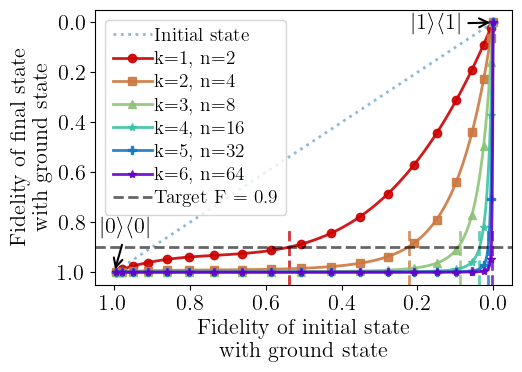

In [63]:
state_0 = np.array([1, 0], dtype=complex)
def fidelity_with_0(state):
    shape = np.shape(state)
    if shape[0] == shape[1]:
        return np.real(np.conj(state_0).T @ state @ state_0)
    else:
        dm = state@state.T.conj()
        return np.real(np.conj(state_0).T @ dm @ state_0)
    
fidelities_original = [fidelity_with_0(x) for x in psis]

max_ext_list = []
fig, ax =  plt.subplots(figsize=(5.5,4))
fidelity = [(1-E)/2 for E in res_init]
ax.plot(fidelities_original,fidelity,label=r"Initial state", alpha=0.5,linestyle=':')

i=0
for key,value in dict_fid_RGCI.items():
    max_ext = max_excitation(fidelities_original,np.real(value),target_fidelity)
    if max_ext is not None:
        ax.axvline(x=max_ext,ymax=0.2, color=color[i], alpha=0.8,linestyle='--')
        max_ext_list.append(max_ext)

    ax.plot(fidelities_original,value,label=key,color=color[i],marker=markers[i],markevery=5,markersize=6,alpha=0.9)
    i+=1

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.ylabel('Fidelity of final state\nwith ground state')
plt.xlabel('Fidelity of initial state\nwith ground state')
ax.axhline(y=target_fidelity, color='k', alpha=0.6,label=r'Target F = 'f'{target_fidelity}',linestyle='--')
ax.legend()

ax.annotate(r'$|1\rangle\langle 1|$', 
            xy=(fidelities_original[0], fidelity[0]), 
            xytext=(fidelities_original[0]+0.08, fidelity[0]+0.05), 
            arrowprops=dict(arrowstyle='->', lw=1.5),
            ha='right', va='bottom')

ax.annotate(r'$|0\rangle\langle 0|$',
            xy=(fidelities_original[-1], fidelity[-1]),  # Point to the data
            xytext=(fidelities_original[-1] - 0.1, fidelity[-1] - 0.22),  # Text location
            arrowprops=dict(arrowstyle='->', lw=1.5),
            ha='right', va='top')

plt.tight_layout()
# plt.savefig(f'plots/QITE_DME_M_50_fidelity_final_vs_original.pdf')


In [64]:
import numpy as np
from scipy.optimize import bisect

def binary_entropy_polarization(epsilon):
    """Binary entropy H in terms of polarization epsilon = 2F - 1, with |epsilon| ≤ 1."""
    F = (1 + abs(epsilon)) / 2
    if F == 0 or F == 1:
        return 0.0
    return -F * np.log2(F) - (1 - F) * np.log2(1 - F)

def polarization_from_entropy(H_target):
    """Invert binary entropy to find |epsilon| (polarization magnitude)."""
    def func(eps):
        return binary_entropy_polarization(eps) - H_target
    # polarization magnitude in [0,1]
    return bisect(func, 0, 1)

def cooling_one_qubit(n, F_initial, steps=5):
    """
    Algorithmic cooling for one cold qubit in n total qubits, handling initial F in [0,1].

    Returns list of (step, fidelity on cold qubit), preserving polarization sign.
    """
    # Convert initial fidelity to polarization (can be negative)
    epsilon_init = 2 * F_initial - 1
    sign = np.sign(epsilon_init)
    eps_abs = abs(epsilon_init)

    H_initial = binary_entropy_polarization(eps_abs)
    total_entropy = n * H_initial

    results = [(0, F_initial)]
    for step in range(1, steps + 1):
        # Min cold qubit entropy bound:
        min_H_cold = max(0, total_entropy - (n - 1))  # max entropy in hot qubits
        H_cold = min_H_cold

        # Find polarization magnitude from entropy
        eps_cold_abs = polarization_from_entropy(H_cold)

        # Restore original polarization sign
        eps_cold = sign * eps_cold_abs
        F_cold = (1 + eps_cold) / 2
        results.append((step, F_cold))

    return results
import numpy as np



In [65]:
import numpy as np

def initial_state_probs(n, initial_fidelity):
    p0 = initial_fidelity
    p1 = 1 - p0
    single_qubit = np.array([p0, p1])
    state = single_qubit
    for _ in range(n - 1):
        state = np.kron(state, single_qubit)
    return state

def hbac_no_bath(n, initial_fidelity, steps):
    joint_probs = initial_state_probs(n, initial_fidelity)
    dim = len(joint_probs)
    
    # Indices for target qubit = 0 or 1 (MSB)
    target_0_indices = [i for i in range(dim) if ((i >> (n - 1)) & 1) == 0]
    target_1_indices = [i for i in range(dim) if ((i >> (n - 1)) & 1) == 1]
    
    # Calculate initial marginal populations
    p0_init = joint_probs[target_0_indices].sum()
    p1_init = joint_probs[target_1_indices].sum()
    
    # Decide which subspace gets the top half after sorting (preserves polarization direction)
    if p0_init >= p1_init:
        top_subspace = target_0_indices
        bottom_subspace = target_1_indices
    else:
        top_subspace = target_1_indices
        bottom_subspace = target_0_indices
    
    half = len(top_subspace)
    
    for _ in range(steps):
        sorted_probs = np.sort(joint_probs)[::-1]
        
        new_joint = np.zeros_like(joint_probs)
        # Assign largest probs to top subspace
        for i, idx in enumerate(top_subspace):
            new_joint[idx] = sorted_probs[i]
        # Assign remaining probs to bottom subspace
        for i, idx in enumerate(bottom_subspace):
            new_joint[idx] = sorted_probs[half + i]
        
        new_joint /= new_joint.sum()
        joint_probs = new_joint
    
    # Compute final fidelity for target qubit = 0
    fidelity = joint_probs[target_0_indices].sum()
    return fidelity


In [79]:
def hbac_ppa(n, initial_fidelity, bath_fidelity, steps):
    """
    Simulate HBAC using closed-form polarization formula for 1 target qubit.

    Args:
        n (int): Total number of qubits (1 target + n-1 reset qubits).
        initial_fidelity (float): (Unused in closed-form) Initial probability of target being in |0⟩.
        bath_fidelity (float): Probability of bath qubit being in |0⟩ (≥ 0.5).
        steps (int): Number of HBAC iterations (depth d).

    Returns:
        float: Final fidelity (probability in |0⟩) of the target qubit.
    """
    # assert 0.5 <= bath_fidelity <= 1.0, "Bath fidelity must be ≥ 0.5"
    # assert n >= 2, "Need at least 2 qubits (1 target + 1 reset)"
    
    m = n - 1
    d = steps
    eps_b = 2 * bath_fidelity - 1  # Bath polarization

    num = (1 + eps_b)**(m * d) - (1 - eps_b)**(m * d)
    denom = (1 + eps_b)**(m * d) + (1 - eps_b)**(m * d)
    eps_final = num / denom

    fidelity_final = 0.5 * (1 + eps_final)
    return fidelity_final


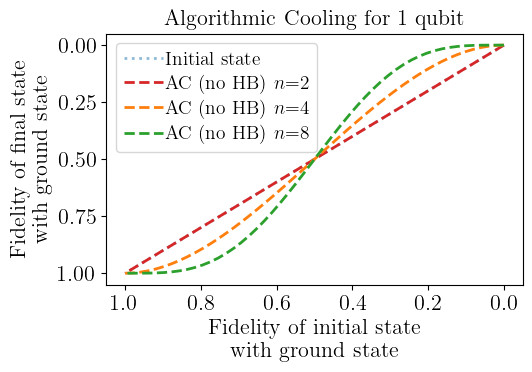

In [80]:
import numpy as np
import matplotlib.pyplot as plt

steps = 5 # number of AC iterations
final_fidelity_AC = np.zeros((len(n_values), len(init_f)))
for i, n in enumerate(n_values):
    for j, F_initial in enumerate(init_f):
        final_fidelity_AC[i, j] = hbac_no_bath(n, F_initial, steps=steps)  # fidelity after the last step


# Plotting
plt.figure(figsize=(5.5,4))
plt.plot(fidelities_original,fidelity,label=r"Initial state", alpha=0.5,linestyle=':')
# Plot algorithmic cooling curves
for i, n in enumerate(n_values):
    plt.plot(init_f, final_fidelity_AC[i], label=f'AC (no HB) $n$={n}', color=colors[i], linestyle='--')
plt.ylabel('Fidelity of final state\nwith ground state')
plt.xlabel('Fidelity of initial state\nwith ground state')
plt.title('Algorithmic Cooling for 1 qubit')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.legend()
plt.show()


In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Settings
init_f = np.linspace(0, 1.0, 50)
n_values = [2, 4, 8]
colors = ['C3', 'C1', 'C2']
target_fidelity = 0.9

In [82]:
steps = 10  # number of AC iterations
final_fidelity_AC = np.zeros((len(n_values), len(init_f)))
for i, n in enumerate(n_values):
    for j, F_initial in enumerate(init_f):
        final_fidelity_AC[i, j] = hbac_no_bath(n, F_initial, steps=steps)  # fidelity after the last step

In [83]:
bath_fid = 0.6  # fidelity of the heat bath (reset qubits)
steps = 2 # number of HBAC iterations
final_fidelity_HBAC = np.zeros((len(n_values), len(init_f)))
for i, n in enumerate(n_values):
    for j, F_initial in enumerate(init_f):
        final_fidelity_HBAC[i, j] = hbac_ppa(n, F_initial,bath_fidelity=F_initial, steps=steps)  # fidelity after the last step

0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of inter

c:\Python\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Python\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


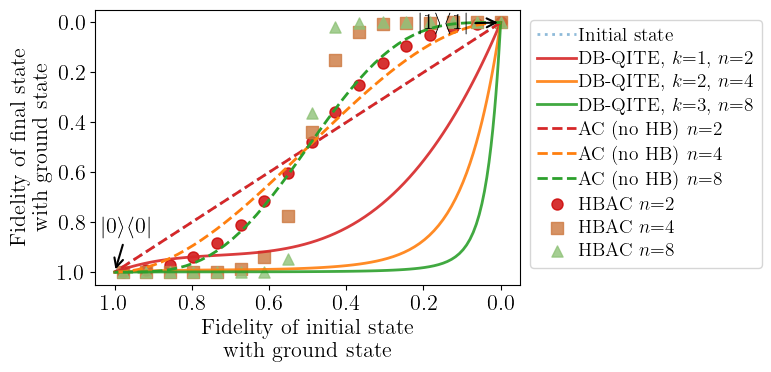

In [84]:


# --- DB-QITE setup ---
psi0 = np.array([[0], [1]])
sig_x = np.array([[0,1], [1,0]])
psis = [expm(-1j*np.pi/2*sig_x*t) @ psi0 for t in np.linspace(0,1,100)]

res_init = [GCI(initial_psi, psi, 1, np.linspace(0.01,1,2)).execute_gci()[0][-1] for psi in psis]
fidelities_original = [fidelity_with_0(p) for p in psis]
initial_fids = [(1 - E) / 2 for E in res_init]

dict_fid_DBQITE = {}
for k in range(1, 4):
    results = [GCI(ideal_DME, psi, None, optimal_s[:k]).execute_gci()[0][-1] for psi in psis]
    label = fr'DB-QITE, $k$={k}, $n$={2**k}'
    dict_fid_DBQITE[label] = [(1 - E)/2 for E in results]

# --- Plotting ---
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(fidelities_original, initial_fids, label="Initial state", linestyle=':', alpha=0.5)
# ax.axhline(y=target_fidelity, color='k', linestyle=':', alpha=0.6,
#            label=fr'Target $F$ = {target_fidelity}')

# Plot DB-QITE results
for i, (label, values) in enumerate(dict_fid_DBQITE.items()):
    ax.plot(fidelities_original, values, label=label, color=colors[i], alpha=0.9)

# Plot algorithmic cooling curves
for i, n in enumerate(n_values):
    ax.plot(init_f, final_fidelity_AC[i], label=f'AC (no HB) $n$={n}', color=colors[i], linestyle='--')

# Plot HBAC cooling curves
for i, n in enumerate(n_values):
    plt.scatter(init_f[::3], final_fidelity_HBAC[i][::3], label=f'HBAC $n$={n}',color=color[i],marker=markers[i],alpha=0.8)

# Annotations
ax.annotate(r'$|1\rangle\langle 1|$', 
            xy=(fidelities_original[0], initial_fids[0]), 
            xytext=(fidelities_original[0]+0.08, initial_fids[0]+0.05),
            arrowprops=dict(arrowstyle='->', lw=1.5), ha='right', va='bottom')

ax.annotate(r'$|0\rangle\langle 0|$', 
            xy=(fidelities_original[-1], initial_fids[-1]), 
            xytext=(fidelities_original[-1] - 0.1, initial_fids[-1] - 0.22),
            arrowprops=dict(arrowstyle='->', lw=1.5), ha='right', va='top')

# Final touches
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xlabel('Fidelity of initial state\nwith ground state')
ax.set_ylabel('Fidelity of final state\nwith ground state')
# ax.set_title('Comparison of different protocol running for 1 step\nfor cooling down 1 qubit')
ax.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
